### Exploring SAG Assembly Metadata for plate AG-910
--notebook by Julia Brown

**Note:** Make sure you are using the **biopy kernel** when running this notebook.

In [1]:
import pandas as pd       # data frame importing and manipulation
import matplotlib.pyplot as plt  # plotting
import seaborn as sns # additional plotting library that allows us to make nice looking, simple plots easily
from collections import Counter  # Simple function that will count items in a list

plt.rcParams["figure.figsize"] = (8,6) # standard plot for the notebook  

In [4]:
PATH_assembly_stats = "/mnt/storage/data/AG-910_assembly_stats.csv"
DF = pd.read_csv(PATH_assembly_stats)

### Q1: What columns are in this data frame?

In [5]:
DF.columns

Index(['well', 'well_type', 'diameter', 'wga_cp', 'raw_read_count',
       'final_assembly_length', 'contig_count', 'max_contig_length',
       'gc_content', 'coding_density', 'rRNA', 'tRNA', 'CDS',
       'percent_CDS_annotated', 'average_CDS_length',
       'checkm1_est_genome_completeness', 'translation_table',
       'multicopy_marker_genes', 'classification_via_GTDBTk',
       '1_SSU_classification', '2_SSU_classification', '3_SSU_classification',
       '531/40_488', '572/27_488', '692/40_488', 'trigger_pulse_width',
       'side_scatter', 'forward_scatter', 'probe', 'notes'],
      dtype='object')

### Q2: What sorts of well types do we have?

In [6]:
Counter(DF['well_type'])

Counter({'1 cell': 317, 'No drop': 64, '10 cells': 3})

* '1 cell' indicates our single sorted cells
* 'No drop' are negative controls
* '10 cells' are positive controls

### Q3: Do read counts differ by well type?

<Axes: xlabel='well_type', ylabel='raw_read_count'>

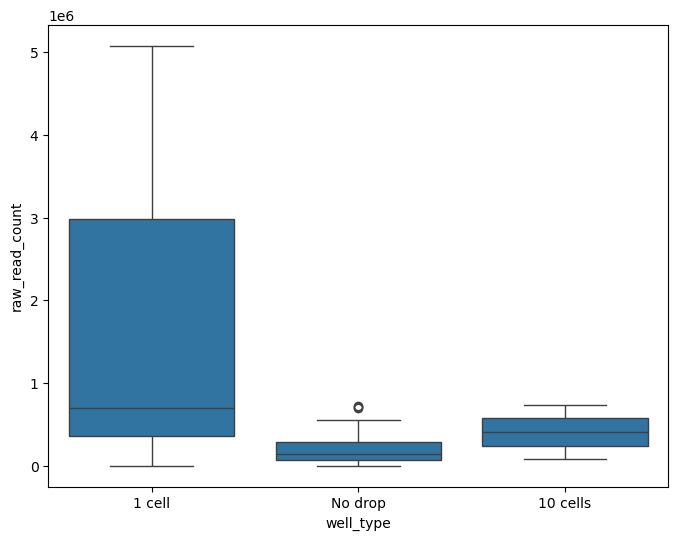

In [7]:
#df['raw_read_count'] = [int(i.replace(',','')) for i in df['raw_read_count']]
sns.boxplot(x = 'well_type', y = 'raw_read_count', data = DF)

### Q4: Do assembly lengths differ by well type?

<Axes: xlabel='well_type', ylabel='final_assembly_length'>

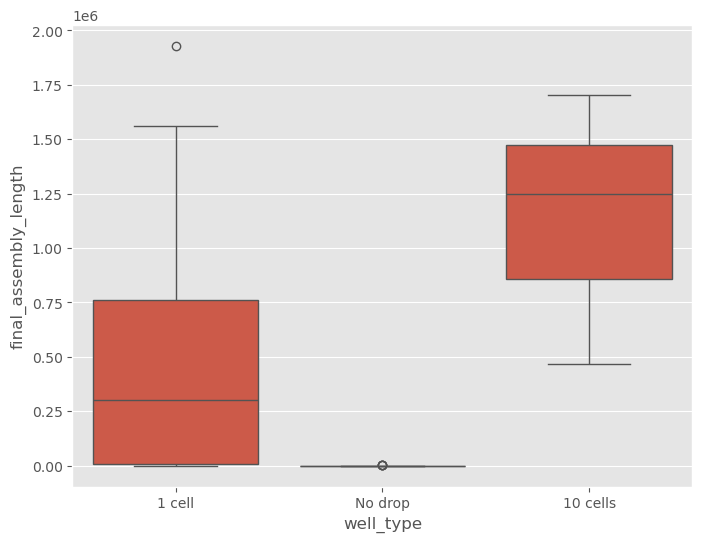

In [40]:
DF[DF['well_type'] == 'No drop'].dropna(subset = ['final_assembly_length'])
sns.boxplot(x = 'well_type', y = 'final_assembly_length', data = DF)

### Q5: Can we refine the DF to only assemblies that were successful? (-> gDF)

In [9]:
# let's examine 'successful' cells, those with a final assembly length > 20kb

gDF = DF[(DF['final_assembly_length'] >= 20000) & (DF['well_type'] == '1 cell')]

To get an overall description of the numeric columns, you can use the pd.describe() method:

In [10]:
gDF.describe()

,wga_cp,raw_read_count,final_assembly_length,contig_count,max_contig_length,gc_content,coding_density,rRNA,tRNA,CDS,...,translation_table,multicopy_marker_genes,2_SSU_classification,3_SSU_classification,531/40_488,572/27_488,692/40_488,trigger_pulse_width,side_scatter,forward_scatter
count,226.000000,2.260000e+02,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.0,226.000000,226.0,226.0,226.00000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,2.544204,2.222619e+06,5.882286e+05,30.070796,97201.115044,31.726947,95.139332,1.017699,13.234513,611.823009,...,11.0,0.026549,0.0,0.0,130.29615,20.322920,55.250310,20699.150442,9.258761,8.645487
std,0.820341,1.397194e+06,3.793381e+05,15.091553,72127.020420,5.263583,4.994491,1.268296,9.130795,389.961200,...,0.0,0.161117,0.0,0.0,89.93959,21.925083,66.087448,3498.786792,9.220791,33.773340
min,1.720000,6.158900e+04,2.169600e+04,2.000000,4603.000000,22.890000,40.602000,0.000000,0.000000,25.000000,...,11.0,0.000000,0.0,0.0,17.64000,1.200000,4.250000,12178.000000,1.030000,1.030000
25%,2.072500,6.176092e+05,2.324260e+05,20.000000,40837.250000,29.447500,95.445250,0.000000,4.000000,241.000000,...,11.0,0.000000,0.0,0.0,69.84750,10.202500,27.592500,18198.250000,4.472500,1.922500
50%,2.305000,2.552710e+06,6.328365e+05,30.000000,90563.000000,30.130000,96.320500,0.000000,13.500000,663.000000,...,11.0,0.000000,0.0,0.0,107.84000,17.025000,41.010000,20758.000000,6.910000,3.125000
75%,2.617500,3.260680e+06,8.805288e+05,39.750000,132836.000000,31.887500,96.718500,2.000000,21.000000,906.500000,...,11.0,0.000000,0.0,0.0,160.59750,24.190000,65.047500,23172.750000,10.940000,5.050000
max,7.280000,5.080878e+06,1.930694e+06,77.000000,376794.000000,62.750000,98.295000,3.000000,30.000000,1856.000000,...,11.0,1.000000,0.0,0.0,585.08000,279.520000,817.130000,39631.000000,102.590000,432.380000


### Q6: For these successful assemblies, pick a metric. Plot it's distribution.

To look into distributions of values, use ```sns.histplot```

<Axes: xlabel='gc_content', ylabel='Count'>

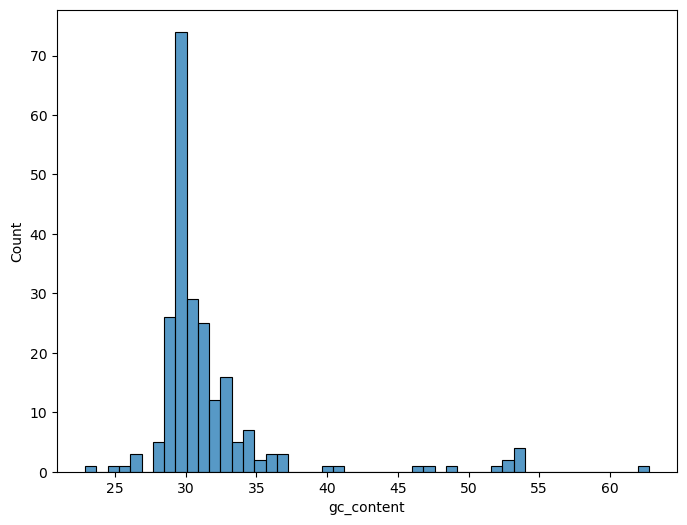

In [11]:
# gc_content distribution

sns.histplot(gDF['gc_content'])

<Axes: xlabel='final_assembly_length', ylabel='Count'>

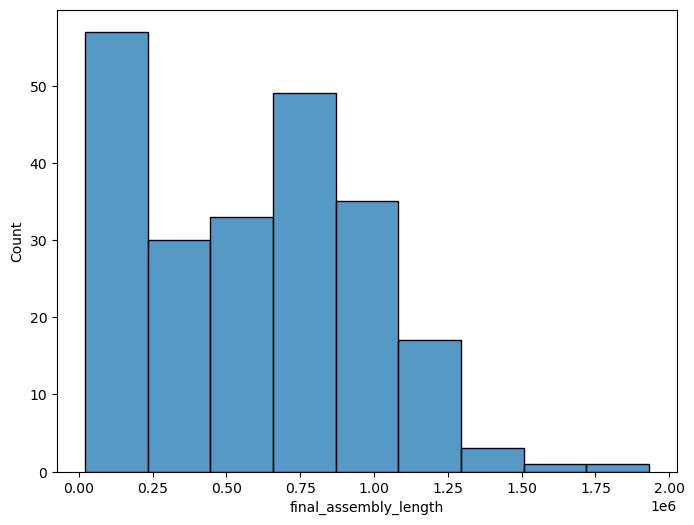

In [12]:
# assembly length distribution

sns.histplot(gDF['final_assembly_length'])

Examine distributions of other aspects of the assembly stats below:

'raw_read_count',
'final_contigs_count', 'final_assembly_length', 'max_contig_length',
       'gc_content', 'checkM_estimated_completeness', 'number_multi_copy',
       'checkM_classification', 'SSU_classification_1'

### Q7: How many of our SAGs have ribosomal gene classifications?

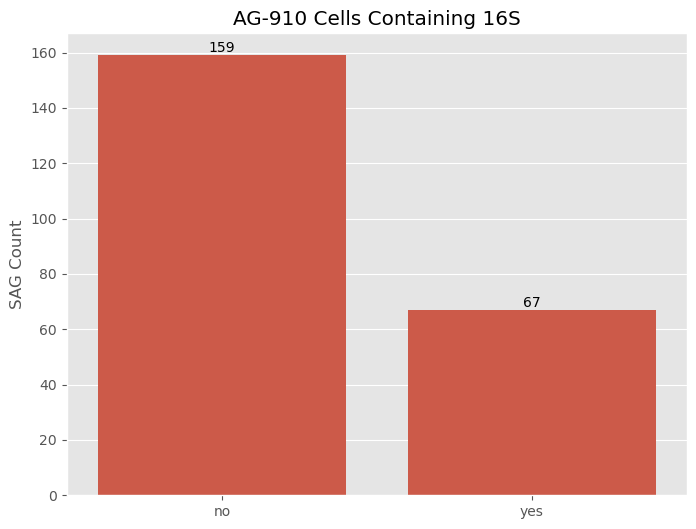

In [64]:
classified_16s = ['no' if '0' in i else 'yes' for i in gDF['1_SSU_classification']]

ax = sns.countplot(x = classified_16s)

ax.set(ylabel="SAG Count",
       title="AG-910 Cells Containing 16S")

# show count on top of bar
ax.bar_label(ax.containers[0])

plt.show()

### Q9: How many of our SAGs have GTDB-Tk classifications?

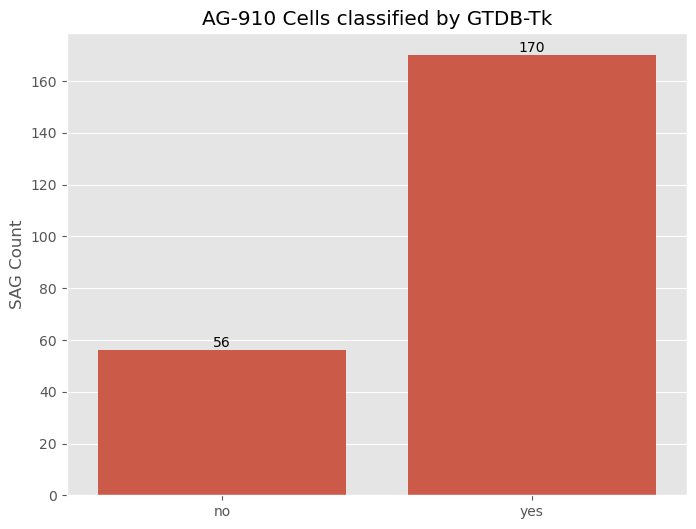

In [63]:
classified_GTDB = ['no' if i == '0' else 'yes' for i in gDF['classification_via_GTDBTk']]

len(classified_GTDB)
ax = sns.countplot(x = classified_GTDB)

ax.set(ylabel="SAG Count",
       title="AG-910 Cells classified by GTDB-Tk")

# show count on top of bar
ax.bar_label(ax.containers[0])

plt.show()

### Q10: Were 16S-classified SAGs longer than the others?

[Text(0, 0.5, 'Final Assembly Length'),
 Text(0.5, 0, 'Contains Classified 16S')]

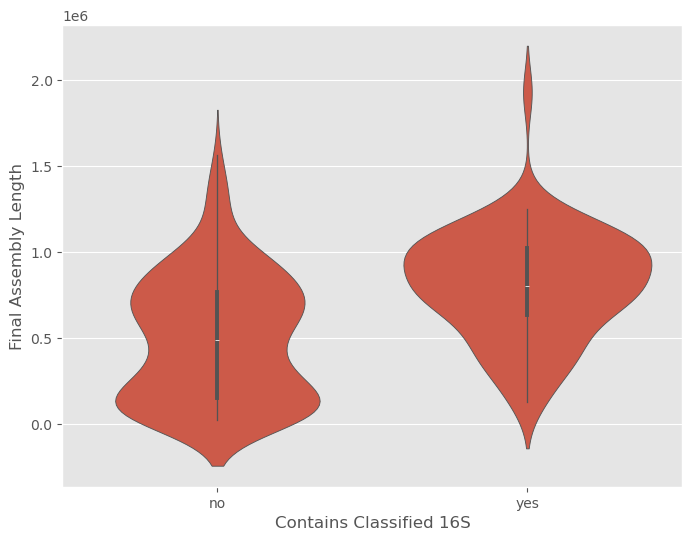

In [65]:
classified_16s = ['no' if '0' in i else 'yes' for i in gDF['1_SSU_classification']]

ax = sns.violinplot(x = classified_16s, y = 'final_assembly_length', data = gDF)

ax.set(ylabel = 'Final Assembly Length',
       xlabel = 'Contains Classified 16S')

# Q11: What 16s Classifications were the most common?

In [66]:
gDF['1_SSU_classification'].value_counts()

1_SSU_classification
0                                                                                                                                159
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__SAR11_clade;f__Surface_1;g__?;s__?                                        23
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__SAR86_clade;g__?;s__?                                11
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodospirillales;f__Rhodospirillaceae;g__AEGEAN-169_marine_group;s__?      8
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__SAR11_clade;f__?;g__?;s__?                                                 8
k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__OM1_clade;g__Candidatus_Actinomarina;s__?                   4
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__SAR11_clade;f__Surface_2;g__?;s__?                                         3
k__Bacteria;p__Proteobacteria;c__Alphaproteobact

# Q12: What GTDB Classifications were the most common?

In [45]:
gDF['classification_via_GTDBTk'].value_counts()

classification_via_GTDBTk
0                                                                                                                                            56
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__                            13
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter_A;s__                           8
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__SAR86;f__TMED112;g__TMED112;s__TMED112 sp003280455                                    4
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__Pelagibacter sp003209915     4
                                                                                                                                             ..
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__TMED127;f__TMED127;g__GCA-2691245;s__                 

In [42]:
DF.columns

Index(['well', 'well_type', 'diameter', 'wga_cp', 'raw_read_count',
       'final_assembly_length', 'contig_count', 'max_contig_length',
       'gc_content', 'coding_density', 'rRNA', 'tRNA', 'CDS',
       'percent_CDS_annotated', 'average_CDS_length',
       'checkm1_est_genome_completeness', 'translation_table',
       'multicopy_marker_genes', 'classification_via_GTDBTk',
       '1_SSU_classification', '2_SSU_classification', '3_SSU_classification',
       '531/40_488', '572/27_488', '692/40_488', 'trigger_pulse_width',
       'side_scatter', 'forward_scatter', 'probe', 'notes'],
      dtype='object')

### Q13: How do assembly stats relate to phylogeny?

Look at assembly size distribution by phlogenetic Order for 16S containing cells:

In [24]:
DF['1_SSU_classification'][1]

'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__SAR86_clade;g__?;s__?'

We want to grab the order, which is the 4th item in this ';' separated phylogeny.  Since python uses 0-based indexing, order is indexed as 3.

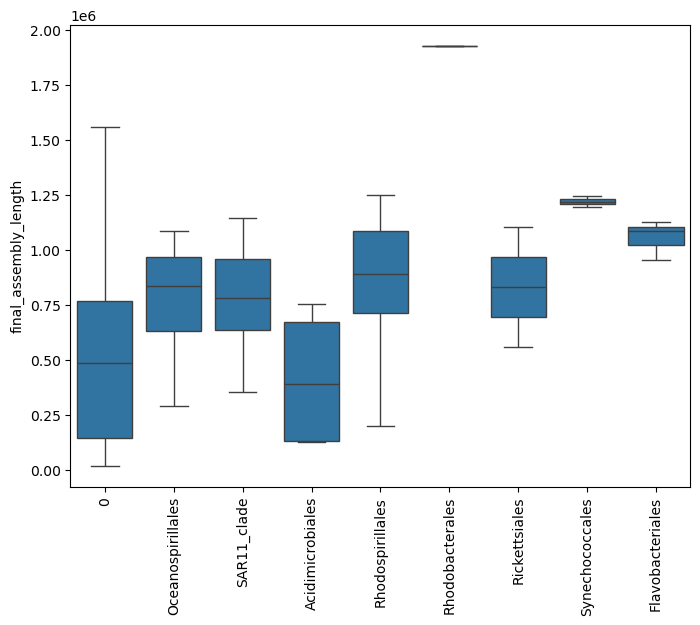

In [26]:
orders = [i if len(i.split(";")) == 1 else i.split(";")[3].replace("o__",'') for i in gDF['1_SSU_classification']]

ax = sns.boxplot(x = orders, y = gDF['final_assembly_length'])
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

### Q14: Lets visualize assembly quality as a dotplot

Ramunas' favorite plot.  
It looks better in R, see cp_vs_completeness_stepanauskas.R

In [27]:
gDF['raw_read_count']

0        61589
1      2596242
2      2514079
3      2648866
5      2652499
        ...   
367    3001784
372    3502173
376    3348772
378    3746824
379     328328
Name: raw_read_count, Length: 226, dtype: int64

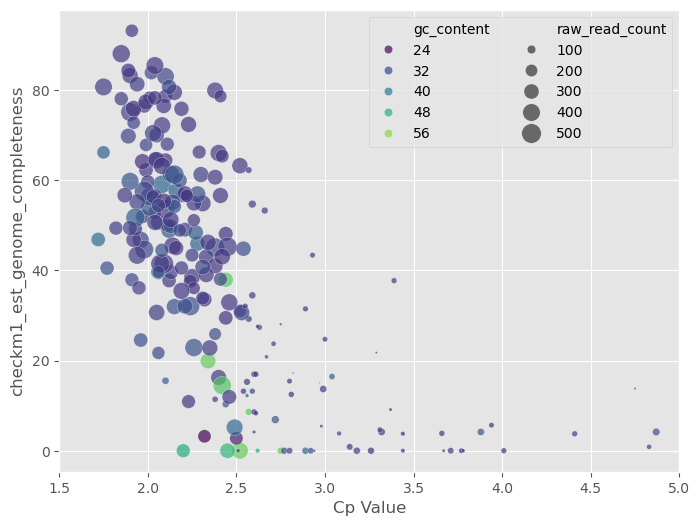

In [30]:
plt.style.use('ggplot')

ax = sns.scatterplot(x = 'wga_cp',
                y = 'checkm1_est_genome_completeness', 
                data = gDF, 
                hue = 'gc_content',
                size = gDF['raw_read_count'] / 10000, 
               palette = 'viridis', 
               alpha = 0.7,   # makes dots transparent
                sizes = (0, 200))

ax.set(xlabel = 'Cp Value')
ax.legend(loc = 'upper right', ncol = 2)
ax.set_xlim(1.5, 5)
plt.show()

In [31]:
DF['raw_read_count'] / 100000

0       0.61589
1      25.96242
2      25.14079
3      26.48866
4       2.10713
         ...   
379     3.28328
380     2.70373
381     0.66744
382     5.29358
383     0.68509
Name: raw_read_count, Length: 384, dtype: float64

Space for plotting other parameters against eachother...

### Extra: Inspecting FACS data 

As Ramunas mentioned, along with genomic data, SCGC also produces optical and physical information per cell sequenced. These metrics include.

<u>Flourescence</u>
* **probe** (the fluorescent dye used on the cell) -- e.g. SYTO-9 is DNA stain
* **531/40_488** (green)
* **572/27_488** (orange)
* **692/40_488** (red)

<u>Particle size and complexity</u>
* **side_scatter**
* **forward_scatter**
* **diameter** (in micrometers)

In [32]:
DF[['well','diameter','side_scatter','forward_scatter','probe','531/40_488','572/27_488','692/40_488']].head()


,well,diameter,side_scatter,forward_scatter,probe,531/40_488,572/27_488,692/40_488
0,AG-910-A01,0.18,3.89,1.03,SYTO-9,17.64,2.40,6.25
1,AG-910-A02,0.24,6.36,2.21,SYTO-9,139.51,19.16,31.04
2,AG-910-A03,0.29,14.88,3.54,SYTO-9,251.06,36.34,141.78
3,AG-910-A04,0.23,8.60,1.80,SYTO-9,61.47,9.13,23.11
4,AG-910-A05,0.53,10.23,16.39,SYTO-9,14.74,3.17,21.99


In [35]:
fDF = DF[(DF['well_type'] == '1 cell') & (DF['final_assembly_length'] > 20000)]

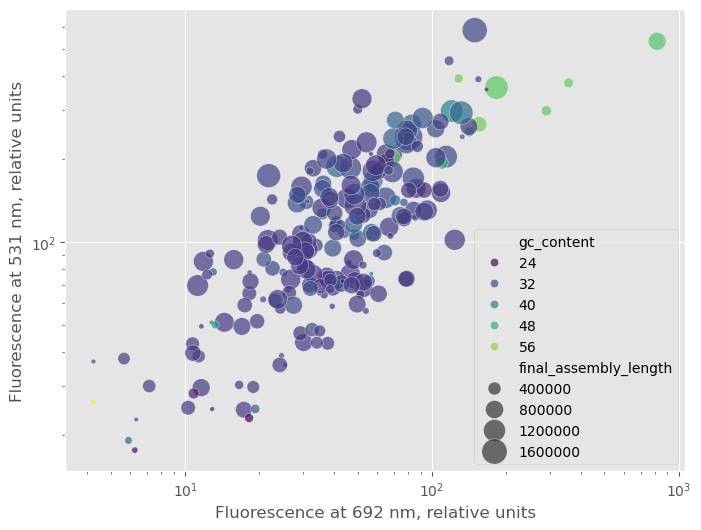

In [37]:
plt.style.use('ggplot')

ax = sns.scatterplot(x = '692/40_488',
                y = '531/40_488', 
                data = fDF, 
                hue = 'gc_content',
                size = 'final_assembly_length',
                palette = 'viridis', 
                alpha = 0.7,   # makes dots transparent
                sizes = (10, 400))

ax.set(xscale = 'log',
       yscale = 'log', 
       xlabel = 'Fluorescence at 692 nm, relative units',
       ylabel = 'Fluorescence at 531 nm, relative units')

ax.legend(loc = 'best', ncol = 1)

plt.show()

There are a number of small assemblies with apparently higher gc_content in the lower lefthand corner of the plot.  What's going on there?  Extract their SAG IDs below:

In [70]:
fDF[(fDF['gc_content'] < 50)][['1_SSU_classification','']].head(10)

0                                                     0
1     k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
2                                                     0
3                                                     0
5                                                     0
9                                                     0
10                                                    0
12                                                    0
13                                                    0
14    k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
Name: 1_SSU_classification, dtype: object

Explore their assembly outputs and QC directories. What do you think these particles are?